# Neural Network for Coupling prediction

## Data preprocessing

Importing the necessary libraries

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Importing datatset as Pandas dataframe and visualizing the first 5 rows

In [2]:
data = pd.read_csv("reduced_dataset/dataset_5angles.csv",sep=";", decimal='.')
data.head()

,DIMERS,Xshift,Yshift,Zshift,alpha_deg,CPL,1st_exc_en,1st_exc_f,2nd_exc_en,2nd_exc_f,exc_split
0,ND3X0.0,-0.000358,-0.000230,3.0,0,0.006596,1.671243,0.000055,2.039965,0.712887,0.368723
1,ND3X0.2,-0.000358,0.539103,3.0,0,0.006328,1.689789,0.000402,2.040880,0.712912,0.351091
2,ND3X0.4,-0.000358,1.078436,3.0,0,0.005679,1.718518,0.000387,2.031394,0.708976,0.312876
3,ND3X0.6,-0.000358,1.617770,3.0,0,0.004892,1.769175,0.000005,2.034753,0.714190,0.265579
4,ND3X0.8,-0.000358,2.157103,3.0,0,0.004065,1.804709,0.000001,2.026748,0.710577,0.222039


Visualizing dataset dimensions

In [3]:
data.shape

(2640, 11)

Input features and output variable selection

In [4]:
X = data[["Xshift","Yshift","Zshift","alpha_deg"]].values
Y = data["CPL"].values*1000 #mev multiplication

Splitting of the data into train set and test set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X.astype(float) ,Y, test_size=0.2)

Scaling of input features

In [6]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Neural Network

Building of the Neural Network architecture

In [7]:
model = Sequential()
model.add(Dense(512, input_shape=(4,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

Configuration of the model for training

In [8]:
model.compile(loss='mse', optimizer='adam')

A brief summary of the model

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2560      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 177,153
Trainable params: 177,153
Non-trai

Number of epochs used for training

In [10]:
num_epochs = 500

Neural Network training

In [11]:
history = model.fit(X_train,y_train,epochs=num_epochs,validation_split = 0.1)

Epoch 1/500
60/60 [==============================] - 1s 5ms/step - loss: 1.1382 - val_loss: 0.7621
Epoch 2/500
60/60 [==============================] - 0s 3ms/step - loss: 0.6302 - val_loss: 0.4181
Epoch 3/500
60/60 [==============================] - 0s 3ms/step - loss: 0.2114 - val_loss: 0.0810
Epoch 4/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0735 - val_loss: 0.0598
Epoch 5/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0328 - val_loss: 0.0332
Epoch 6/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0202 - val_loss: 0.0124
Epoch 7/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0088 - val_loss: 0.0053
Epoch 8/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0080 - val_loss: 0.0127
Epoch 9/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0107 - val_loss: 0.0099
Epoch 10/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0067 - val_loss: 0.0084
Epoch 11/

60/60 [==============================] - 0s 3ms/step - loss: 0.0121 - val_loss: 0.0159
Epoch 84/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0064 - val_loss: 0.0037
Epoch 85/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 86/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 87/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 9.6365e-04
Epoch 88/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 7.7384e-04
Epoch 89/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 90/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0023
Epoch 91/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 92/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0025
Epoch

Epoch 164/500
60/60 [==============================] - 0s 3ms/step - loss: 7.4515e-04 - val_loss: 9.2831e-04
Epoch 165/500
60/60 [==============================] - 0s 3ms/step - loss: 6.7969e-04 - val_loss: 8.5685e-04
Epoch 166/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0035
Epoch 167/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0049 - val_loss: 0.0062
Epoch 168/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0053 - val_loss: 0.0024
Epoch 169/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0053
Epoch 170/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0015
Epoch 171/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0023
Epoch 172/500
60/60 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 173/500
60/60 [==============================] - 0s 3ms/step - loss: 

60/60 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0023
Epoch 244/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0033
Epoch 245/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0096 - val_loss: 0.0048
Epoch 246/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0018
Epoch 247/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 248/500
60/60 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 249/500
60/60 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 250/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 251/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 252/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0020
Epoc

60/60 [==============================] - 0s 3ms/step - loss: 2.8618e-04 - val_loss: 5.3690e-04
Epoch 323/500
60/60 [==============================] - 0s 3ms/step - loss: 3.4655e-04 - val_loss: 6.8854e-04
Epoch 324/500
60/60 [==============================] - 0s 3ms/step - loss: 3.5700e-04 - val_loss: 7.6453e-04
Epoch 325/500
60/60 [==============================] - 0s 4ms/step - loss: 2.2603e-04 - val_loss: 5.5638e-04
Epoch 326/500
60/60 [==============================] - 0s 3ms/step - loss: 2.1534e-04 - val_loss: 4.9479e-04
Epoch 327/500
60/60 [==============================] - 0s 3ms/step - loss: 3.1958e-04 - val_loss: 8.4094e-04
Epoch 328/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 9.8832e-04
Epoch 329/500
60/60 [==============================] - 0s 3ms/step - loss: 4.7958e-04 - val_loss: 6.7221e-04
Epoch 330/500
60/60 [==============================] - 0s 3ms/step - loss: 4.5237e-04 - val_loss: 0.0011
Epoch 331/500
60/60 [====================

60/60 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 7.2777e-04
Epoch 400/500
60/60 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 401/500
60/60 [==============================] - 0s 4ms/step - loss: 5.0064e-04 - val_loss: 7.5130e-04
Epoch 402/500
60/60 [==============================] - 0s 4ms/step - loss: 0.0049 - val_loss: 0.0115
Epoch 403/500
60/60 [==============================] - 0s 4ms/step - loss: 0.0053 - val_loss: 0.0042
Epoch 404/500
60/60 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 405/500
60/60 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 406/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 407/500
60/60 [==============================] - 0s 3ms/step - loss: 9.6901e-04 - val_loss: 8.4183e-04
Epoch 408/500
60/60 [==============================] - 0s 3ms/step - loss: 3.6802e-04

Epoch 477/500
60/60 [==============================] - 0s 4ms/step - loss: 9.0695e-04 - val_loss: 5.3642e-04
Epoch 478/500
60/60 [==============================] - 0s 3ms/step - loss: 5.1899e-04 - val_loss: 6.5921e-04
Epoch 479/500
60/60 [==============================] - 0s 3ms/step - loss: 4.7109e-04 - val_loss: 7.1259e-04
Epoch 480/500
60/60 [==============================] - 0s 3ms/step - loss: 6.0555e-04 - val_loss: 5.1738e-04
Epoch 481/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 6.0617e-04
Epoch 482/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 483/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 484/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 485/500
60/60 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 8.8491e-04
Epoch 486/500
60/60 [==============================

# Model Evaluation

In [12]:
#Model testing
test_eval = model.evaluate(X_test, y_test)

17/17 [==============================] - 0s 2ms/step - loss: 0.0020


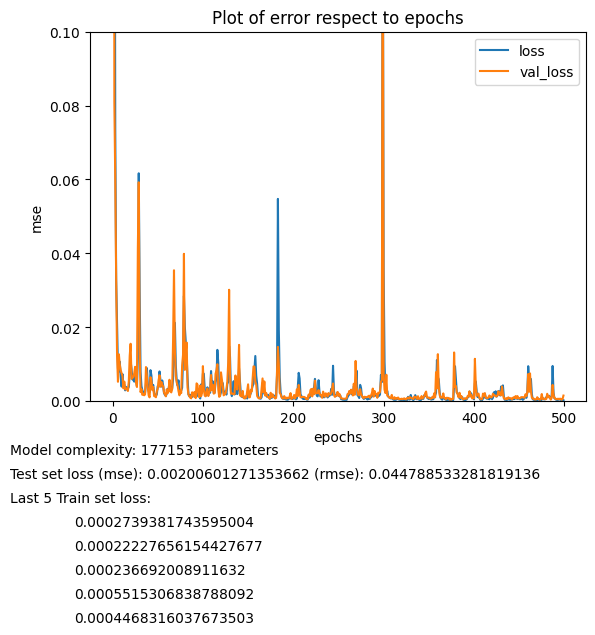

In [13]:
#plotting of training information
plt.plot(range(num_epochs),history.history['loss'])
plt.plot(range(num_epochs),history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.ylabel('mse')
plt.xlabel('epochs')
plt.title('Plot of error respect to epochs')
plt.ylim([0, 1e-1])
plt.figtext(0, 0, "Model complexity: "+str(model.count_params())+" parameters", fontsize=10)
plt.figtext(0, -0.05, "Test set loss (mse): "+str(test_eval)+" (rmse): "+str(math.sqrt(test_eval)), fontsize=10)
plt.figtext(0, -0.1, "Last 5 Train set loss:", fontsize=10)
plt.figtext(0.1, -0.15, str(history.history['loss'][-1]), fontsize=10)
plt.figtext(0.1, -0.2, str(history.history['loss'][-2]), fontsize=10)
plt.figtext(0.1, -0.25, str(history.history['loss'][-3]), fontsize=10)
plt.figtext(0.1, -0.3, str(history.history['loss'][-4]), fontsize=10)
plt.figtext(0.1, -0.35, str(history.history['loss'][-5]), fontsize=10)
plt.show()

# Empirical testing

In this part, model can be evaluated with empirical examples

In [14]:
#emp_test = np.array([-2.9219,3.009,4.4996,45])
#emp_test = np.reshape(emp_test,(1,4))
#emp_test = ss.transform(emp_test)

In [15]:
#model.predict(emp_test)

# Scatter plot

In [16]:
#Function that returns all the predictions of train set into a list
def predictions(X_test):
    pred = []

    for i in range(0,X_test.shape[0]):
        k = X_test[i]
        k = np.reshape(k,(1,4))
        #k = ss.transform(k)
        pred.append(float(model.predict(k))) 
    return pred

In [17]:
pred = predictions(X_test)

In [18]:
#mse test(to check if predictions are good)
mse = (y_test-pred)**2
np.sum(mse)/mse.shape[0]

0.0020060120880269813

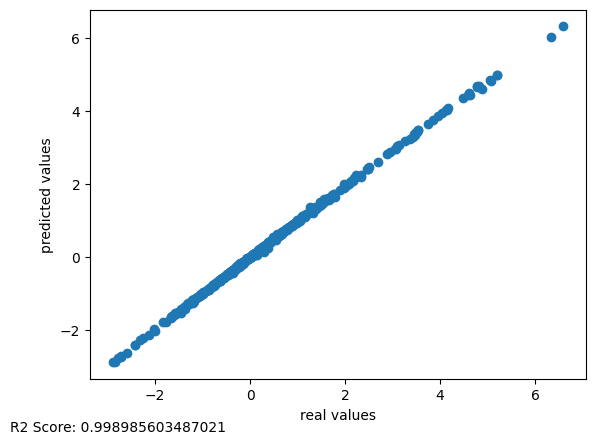

In [19]:
#scatter plot and r2 score
import sklearn
sklearn.metrics.r2_score(y_test,pred)

plt.scatter(y_test,pred)
plt.ylabel('predicted values')
plt.xlabel('real values')
plt.figtext(0, 0, "R2 Score: "+str(sklearn.metrics.r2_score(y_test,pred)), fontsize=10)
plt.show()

# Saving model

In [26]:
model.save('CPL_meV.h5')